In [1]:
import matplotlib.pyplot as plt
from glob import glob

In [2]:
# anime review lengths distribution
anime_list = glob('../archive/reviews/*.json')
print(len(anime_list))

12179


In [3]:
import json
from tqdm import tqdm

reviews_all = []
wrong_num = 0
for a in tqdm(anime_list):
    try:
        reviews_all.extend(json.load(open(a))['reviews'])
    except:
        try:
            reviews_all.extend(json.load(open(a, encoding='ISO-8859-1'))['reviews'])
        except Exception as e:
            wrong_num+=1
#             print('Wrong in', a, e)
print(wrong_num)

100%|██████████| 12179/12179 [00:08<00:00, 1461.83it/s]

80


In [4]:
print(len(reviews_all))

129552


In [6]:
lengths = []
for r in tqdm(reviews_all):
    lengths.append(len(r.split()))

100%|██████████| 129552/129552 [00:04<00:00, 32083.85it/s]


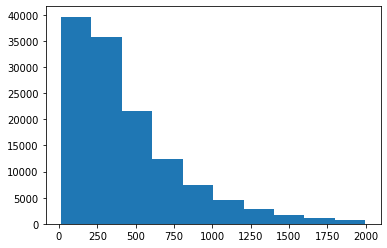

In [10]:
plt.hist([l for l in lengths if l<2000])
plt.show()

In [15]:
# lmdb review lengths distribution
pos_list = glob('../aclImdb/train/pos/*.txt')
neg_list = glob('../aclImdb/train/neg/*.txt')
lmdb_list = pos_list+neg_list
print(len(lmdb_list))

25000


In [22]:
lmdbs = []
for l in tqdm(lmdb_list):
    with open(l, 'r') as f:
        x = f.readlines()
        lmdbs.extend(x)

100%|██████████| 25000/25000 [00:01<00:00, 20545.83it/s]


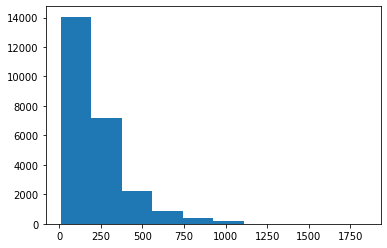

In [24]:
lengths2 = [len(l.split()) for l in lmdbs if len(l.split())<2000]
plt.hist(lengths2)
plt.show()